<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Introduction to the Web Land Trajectory Service (WLTS) in R language</span>
<hr style="border:2px solid #0077b9;">

<div style=text-align: left;>
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/wlts/wlts-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Fabiana Zioti<sup><a href="https://orcid.org/0000-0002-7305-6043"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Rennan F. B. Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Karine Reis Ferreira<sup><a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: February 16, 2023
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use WLTS to discover and access land use and cover trajectories data from well-known projects, including PRODES, DETER, and TerraClass.
</div>    

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is supplement to the of the following papers:</b>
    <div style="margin-left: 10px; margin-right: 10px; margin-top:10px">
      <p> Zioti, F.;  Ferreira, K.R.; Queiroz, G.R.; Neves, A.K; Carlos, F. M.; Souza, F. C.; Santos, L. A.; Simoes, R. E. O. 2021. A platform for land use and land cover data integration and trajectory analysis. International Journal of Applied Earth Observation and Geoinformation. DOI <a href="https://doi.org/10.1016/j.jag.2021.102655" target="_blank"> 10.1016/j.jag.2021.102655 </a>. </p>
    </div>     
      <p> Ferreira, K.R.; Queiroz, G.R.; Vinhas, L.; Marujo, R.F.B.; Simoes, R.E.O.; Picoli, M.C.A.; Camara, G.; Cartaxo, R.; Gomes, V.C.F.; Santos, L.A.; Sanchez, A.H.; Arcanjo, J.S.; Fronza, J.G.; Noronha, C.A.; Costa, R.W.; Zaglia, M.C.; Zioti, F.; Korting, T.S.; Soares, A.R.; Chaves, M.E.D.; Fonseca, L.M.G. 2020. Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products. Remote Sens. 12, no. 24: 4033. DOI: <a href="https://doi.org/10.3390/rs12244033" target="_blank">10.3390/rs12244033</a>. </p>
      <p> Zioti, F.; Gomes, V.C.F.; Ferreira, K.R.; Queiroz, G.R.; Rodriguez, E. L. 2019. Um ambiente para acesso e análise de trajetórias de uso e cobertura da Terra. Anais do XIX Simpósio Brasileiro de Sensoriamento Remoto.São José dos Campos, INPE, 2019. <a href="https://proceedings.science/sbsr-2019/papers/um-ambiente-para-acesso-e-analise-de-trajetorias-de-uso-e-cobertura-da-terra" target="_blank"> Online </a>. </p>
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The **W**eb **L**and **T**rajectory **S**ervice (WLTS) is a web service designed to access and retrieve trajectories of land use and coverage from different type of data sources. Through a simple API, it brings the concept of Land Use and Cover Trajectories as a high level abstraction. Given a location and a time interval you can retrieve the land trajectory from many data collections, including information from the PRODES, DETER, and TerraClass projects.

`Figure 1` shows an example of representation of land use and cover trajectories extracted from a set of classified images, temporally ordered:

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/trajectory_def.png" width="600" />
    <br/>
    <b>Figure 1</b> - Land use and cover Trajectory.
</center>

The WLTS introduces the following concepts:

- **Collections**: refers to a specific dataset from a given data source. A collection can be either represented by vector or raster structures. It has a time interval delimited by time (tmin, tmax). In this way, each Collection has an associated time attribute, which is aligned according to the time granularity of each project that makes the Collection available.
- **Class**: It is the label associated with a particular data item, which corresponds to the specific types of land use or cover, defined by the data source classification system. A Collection consists of a set of Class.
- **Trajectory**: Given a spatial location (x, y), a trajectory is represented by a set of observations that contains the land use and land cover class, the name of collection and time associated with an x, y location in space.

`Figure 2` presents an overview from the point of view of the user who makes a request to WLTS:

<center>
    <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0303243421003627-gr5.jpg" width="600" />,
    <br/>
    <b>Figure 2</b> - WLTS Overview.
</center>

WLTS is based on three operations:

- ``list_collections``: returns the list of collections available in the service.

- ``describe_collection``: returns the metadata of a given data collection.

- ``trajectory``: returns the land use and cover trajectory from the collections given a location in space. The property result contains the feature identifier information, class, time, and the collection associated to the data item.

This Jupyter Notebook shows how to use the [R Client Library](https://github.com/brazil-data-cube/rwlts) for Web Land Trajectory Service.

# R Client API
<hr style="border:1px solid #0077b9;">

In [1]:
# removing warning messages
options(warn=-1)

To run the examples in this Jupyter Notebook you will need to install the [rwlts client for R](https://github.com/brazil-data-cube/rwlts). The command below installs rwlts directly from the Brazil Data Cube project's code repository using remotes.

In [2]:
devtools::install_github("brazil-data-cube/rwlts@v0.8.0", upgrade = "never")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpMM0U3G/remotes216073bbf/brazil-data-cube-rwlts-b0ac467/DESCRIPTION’ ... OK
* preparing ‘rwlts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rwlts_0.8.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The command below installs the packages required to run this Jupyter Notebook.

In [3]:
library(rwlts)  # rwlts package
library(tibble) # package to represent data.frame structure

> If you do not have a BDC `Access Token`, please access [Brazil Data Cube Explorer](https://brazildatacube.dpi.inpe.br/portal/explore) and create an account. Then go to the management panel and generate a new `Access Token`.

In [4]:
bdc_access_key <- "change-me"

After that you can check the installed version of the WLTS client package:

In [5]:
packageVersion("rwlts")

[1] ‘0.8.0’

WLTS is a client-server service. On the server side, data is made available, which can be accessed through each of the API operations, described earlier. On the client side (what this tutorial covers), you can use the operations and consume the data. In this tutorial we will use the R client to access the data. We need to define the URL where the WLTS server is operating. The code below defines the URL of the WLTS server we will query:

In [6]:
wlts_bdc <- "https://brazildatacube.dpi.inpe.br/wlts/"

# Listing the Available Collections
<hr style="border:1px solid #0077b9;">

In WLTS, datasets that aggregate features from different classification systems, which various projects may generate, are represented using collections (**collections**). Thus, the first operation presented is `list_collections`. This operation returns a list of all the data collections available in the WLTS:

In [7]:
list_collections(wlts_bdc)

[1] "prodes_caatinga"             "prodes_cerrado"             
 [3] "prodes_pampa"                "lapig_areas_pastagem"       
 [5] "prodes_amazonia_legal_nuvem" "deter_amazonia_legal"       
 [7] "deter_cerrado"               "prodes_pantanal"            
 [9] "ibge_cobertura_uso_terra"    "prodes_amazonia_legal"      
[11] "terraclass_amazonia"         "mapbiomas-v6"               
[13] "mapbiomas_mata_atlantica-v5" "mapbiomas_pampa-v5"         
[15] "terraclass_amazonia-v2"      "terraclass_cerrado"         
[17] "mapbiomas-v7"                "mapbiomas_pantanal-v5"      
[19] "mapbiomas_amazonia-v5"       "mapbiomas_cerrado-v5"

> The names returned can be used in subsequent operations.

# Retrieving the Metadata of a collection
<hr style="border:1px solid #0077b9;">


Each collection is associated with a set of metadata that describes it. In WLTS, there is the operation called `describe_collection`, which allows the retrieval of this information.

> The example below retrieves the metadata from the collection called `prodes_cerrado`.

In [8]:
describe_collection(wlts_bdc, "prodes_cerrado")

$classification_system
$classification_system$id
[1] "4"

$classification_system$name
[1] "PRODES"

$classification_system$title
NULL

$classification_system$type
[1] "Feature"

$classification_system$version
[1] "1.0"


$collection_type
[1] "Feature"

$datasource
$datasource$host
[1] "https://brazildatacube.dpi.inpe.br/bdc/geoserver"

$datasource$layers
$datasource$layers[[1]]
$datasource$layers[[1]]$data_field
[1] "year"

$datasource$layers[[1]]$layer_name
[1] "prodes_cerrado_desmatamento"

$datasource$layers[[1]]$title
[1] "Desmatamento - PRODES Cerrado"

$datasource$layers[[1]]$workspace
[1] "inpe_eogd"


$datasource$layers[[2]]
$datasource$layers[[2]]$data_field
[1] "year"

$datasource$layers[[2]]$layer_name
[1] "prodes_cerrado_hidrografia"

$datasource$layers[[2]]$title
[1] "Hidrografia - PRODES Cerrado"

$datasource$layers[[2]]$workspace
[1] "inpe_eogd"




$deprecated
[1] FALSE

$description
[1] "PRODES Cerrado que consiste no mapeamento do desmatamento para toda extensão do Cerrado."

$detail
[1] "O Brasil se viu encorajado a estruturar um sistema oficial de monitoramento sistemático do desmatamento para esta região. Neste contexto, o Instituto Nacional de Pesquisas Espaciais (INPE) está divulgando os resultados do projeto PRODES Cerrado que consiste no mapeamento do desmatamento para toda extensão do Cerrado de 2000 a 2018. Por meio do projeto foi construída uma séria histórica bienal da remoção antrópica da vegetação natural para o período de 2000 a 2012 e anual para os anos de 2013 a 2021. Mais informações: http://cerrado.obt.inpe.br/"

$is_public
[1] TRUE

$name
[1] "prodes_cerrado"

$period
$period$end_date
[1] "2021"

$period$start_date
[1] "2000"


$spatial_extent
$spatial_extent$xmax
[1] -24.68512

$spatial_extent$xmin
[1] -60.09396

$spatial_extent$ymax
[1] -2.326709

$spatial_extent$ymin
[1] -41.52247


$temporal_resolution
$temporal_resolution$unit
[1] "YEAR"

$temporal_resolution$value
[1] 1


$title
[1] "PRODES Cerrado"

# Retrieving the Trajectory
<hr style="border:1px solid #0077b9;">

In WLTS, since a collection is associated with a dataset with time variation, it is possible to retrieve the land use and land cover trajectory of a given point. The figure below illustrates this process.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj1.png" width="750" />,
    <br/>
    <b>Figure 3</b> - WLTS trajectory extraction.
</center>

To retrieve the trajectory at the location of `latitude -12.0` and` longitude -54.0` we use the `get_trajectory()` function:

In [9]:
trj_tc_amazon1 <- get_trajectory(wlts_bdc,
               latitude  = -12.0, 
               longitude = -54.0, 
               collections = 'terraclass_amazonia-v2', 
               config = httr::add_headers("x-api-key" = bdc_access_key))

In [10]:
# in case of lagging, remove '#' from the line below #If you are running locally change the path to match the intro-wlts-bkp folder
# trj_tc_amazon1 <- readRDS("/kaggle/input/intro-wlts-bkp/trj_tc_amazon1.rds")

In [11]:
trj_tc_amazon1

$query
NULL

$result
# A tibble: 5 × 4
  class                                collection             date  point_id
  <chr>                                <chr>                  <chr>    <int>
1 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2004         1
2 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2008         1
3 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2010         1
4 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2012         1
5 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2014         1

attr(,"class")
[1] "wlts"

> The coordinates of the request must be in EPSG: 4326

This object contains the query and result attributes. The query attribute stores the query that was used to retrieve the data. By default, it will be NULL. For this information to be stored, the parameter ``query_info = TRUE`` is required. For example:

In [12]:
trj_tc_amazon2 <- get_trajectory(wlts_bdc, 
               latitude  = -12, 
               longitude = -54, 
               collections = "terraclass_amazonia-v2", 
               query_info  = TRUE,
               config = httr::add_headers("x-api-key" = bdc_access_key))

In [13]:
# in case of lagging, remove '#' from the line below #If you are running locally change the path to match the intro-wlts-bkp folder
# trj_tc_amazon2 <- readRDS("/kaggle/input/intro-wlts-bkp/trj_tc_amazon2.rds")

In [14]:
trj_tc_amazon2

$query
$query[[1]]
$query[[1]]$collections
$query[[1]]$collections[[1]]
[1] "terraclass_amazonia-v2"


$query[[1]]$end_date
[1] ""

$query[[1]]$geometry
[1] ""

$query[[1]]$language
[1] "pt-br"

$query[[1]]$latitude
[1] -12

$query[[1]]$longitude
[1] -54

$query[[1]]$start_date
[1] ""



$result
# A tibble: 5 × 4
  class                                collection             date  point_id
  <chr>                                <chr>                  <chr>    <int>
1 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2004         1
2 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2008         1
3 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2010         1
4 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2012         1
5 Vegetação Natural Florestal Primária terraclass_amazonia-v2 2014         1

attr(,"class")
[1] "wlts"

WLTS allows more than one collection to be accessed at the same time for the same point. By doing this, a trajectory for each project will be extracted. This way of operation is illustrated by the figure below.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj2.png" width="750" />,
    <br/>
    <b>Figure 3</b> - WLTS trajectory extraction using multiple collections.
</center>

The names are provided in the `collections` parameter and must be separated by a comma. As an example, the code below retrieves the trajectories considering the collections ``mapbiomas_amazonia-v6`` and `` terraclass_amazonia-v2``.

In [15]:
trj_tc_map_amazon1 <- get_trajectory(wlts_bdc, 
               latitude  = -12.0, 
               longitude = -54.0, 
               collections = c("terraclass_amazonia-v2", "mapbiomas-v7"),
               config = httr::add_headers("x-api-key" = bdc_access_key))

In [16]:
# in case of lagging, remove '#' from the line below #If you are running locally change the path to match the intro-wlts-bkp folder
# trj_tc_map_amazon1 <- readRDS("/kaggle/input/intro-wlts-bkp/trj_tc_map_amazon1.rds")

In [17]:
head(trj_tc_map_amazon1, 20)

class,collection,date,point_id
<chr>,<chr>,<chr>,<int>
Formação Florestal,mapbiomas-v7,1985,1
Formação Florestal,mapbiomas-v7,1986,1
Formação Florestal,mapbiomas-v7,1987,1
Formação Florestal,mapbiomas-v7,1988,1
Formação Florestal,mapbiomas-v7,1989,1
Formação Florestal,mapbiomas-v7,1990,1
Formação Florestal,mapbiomas-v7,1991,1
Formação Florestal,mapbiomas-v7,1992,1
Formação Florestal,mapbiomas-v7,1993,1


# Accessing the Trajectory data as Tibble
<hr style="border:1px solid #0077b9;">

When the data is retrieved from the server, it is inserted into a ``tibble``, allowing for easy manipulation. To make use of it, it is necessary to access the information present in the ``result`` key returned by the get_trajectory function.

In [18]:
tj1 <- get_trajectory(wlts_bdc, 
                    latitude = -12.0, 
                    longitude = -54.0, 
                    collections = "terraclass_amazonia-v2",
                    config = httr::add_headers("x-api-key" = bdc_access_key))

In [19]:
# in case of lagging, remove '#' from the line below #If you are running locally change the path to match the intro-wlts-bkp folder
# tj1 <- readRDS("/kaggle/input/intro-wlts-bkp/tj1.rds")

In [20]:
head(tj1$result, 5)

class,collection,date,point_id
<chr>,<chr>,<chr>,<int>
Vegetação Natural Florestal Primária,terraclass_amazonia-v2,2004,1
Vegetação Natural Florestal Primária,terraclass_amazonia-v2,2008,1
Vegetação Natural Florestal Primária,terraclass_amazonia-v2,2010,1
Vegetação Natural Florestal Primária,terraclass_amazonia-v2,2012,1
Vegetação Natural Florestal Primária,terraclass_amazonia-v2,2014,1


# Multiple Point Retrieval
<hr style="border:1px solid #0077b9;">

The ``point_id`` column of the result table is used to identify the entry point. This ID is needed because the `get_trajectory()` function can be used with arrays as input. For example, the code below retrieves the trajectory data from the collection ``mapbiomas_amazonia-v6`` for two points ``(-54, -12) and (-54, -11.01)``.

In [21]:
trj_mult <- get_trajectory(wlts_bdc,
                           latitude = c(-12, -11.01), 
                           longitude = c(-54, -54), 
                           collections = "mapbiomas-v7",
                           config = httr::add_headers("x-api-key" = bdc_access_key))

In [22]:
# in case of lagging, remove '#' from the line below #If you are running locally change the path to match the intro-wlts-bkp folder
# trj_mult <- readRDS("/kaggle/input/intro-wlts-bkp/trj_mult.rds")

In [23]:
head(trj_mult$result, 20)

class,collection,date,point_id
<chr>,<chr>,<chr>,<int>
Formação Florestal,mapbiomas-v7,1985,1
Formação Florestal,mapbiomas-v7,1986,1
Formação Florestal,mapbiomas-v7,1987,1
Formação Florestal,mapbiomas-v7,1988,1
Formação Florestal,mapbiomas-v7,1989,1
Formação Florestal,mapbiomas-v7,1990,1
Formação Florestal,mapbiomas-v7,1991,1
Formação Florestal,mapbiomas-v7,1992,1
Formação Florestal,mapbiomas-v7,1993,1


We can filter the result of the trajectory using the ``point_id``:

In [24]:
dplyr::filter(trj_mult$result, point_id == 2)

class,collection,date,point_id
<chr>,<chr>,<chr>,<int>
Formação Florestal,mapbiomas-v7,1985,2
Formação Florestal,mapbiomas-v7,1986,2
Formação Florestal,mapbiomas-v7,1987,2
Formação Florestal,mapbiomas-v7,1988,2
Formação Florestal,mapbiomas-v7,1989,2
Formação Florestal,mapbiomas-v7,1990,2
Formação Florestal,mapbiomas-v7,1991,2
Formação Florestal,mapbiomas-v7,1992,2
Formação Florestal,mapbiomas-v7,1993,2


# Visualization of trajectories with Alluvial plot
<hr style="border:1px solid #0077b9;">

The command below installs the additional packages required to run this Jupyter Notebook.

In [25]:
library(magrittr)   # operador pipe %>%
library(leaflet)    # plot maps with leaflet
library(sf)         # Simple Features to manipulate vector files
library(ggplot2)    # package to create plots
library(ggalluvial) # package to create plots
library(cowplot)    # package to create plots

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE



First, let's preview the points we will query in the wlts service. The next cell uses the ``st_read`` function to load the data with the samples of interest:

In [26]:
#If you are running locally change the path to match the sao-felix-do-xingu-samples folder
samples_tbl <- sf::st_read("/kaggle/input/sao-felix-do-xingu-samples") #Use this if running in kaggle

Reading layer `sao-felix-do-xingu-samples' from data source 
  `/kaggle/input/sao-felix-do-xingu-samples' using driver `ESRI Shapefile'
Simple feature collection with 140 features and 1 field
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -52.94381 ymin: -6.444115 xmax: -52.82602 ymax: -6.362312
Geodetic CRS:  WGS 84


We will use the `leaflet` package for interactive spatial visualization of the points.

In [ ]:
#
# interactive map creation
#
leaflet::leaflet(width="100%", height="600px") %>%
   addProviderTiles(providers$Esri.WorldImagery) %>%
   setView(lng = -52.87, lat = -6.4, zoom = 12) %>%
   addCircleMarkers(data   = sf::st_cast(samples_tbl, "POINT"),
                    radius = 4,
                    stroke = FALSE,
                    fillOpacity = 1)

To extract the trajectories from the samples above, the code snippet was used: 
```r
samples_trj <- rwlts::get_trajectory(
    URL = "https://brazildatacube.dpi.inpe.br/wlts/",
    latitude = sf::st_coordinates(samples_tbl)[,2],
    longitude = sf::st_coordinates(samples_tbl)[,1],
    collections = "terraclass_amazonia-v2",
    query_info = FALSE,
    config = httr::add_headers("x-api-key" = bdc_access_key)
)
```

For demonstration purposes, we will load the already extracted trajectories with the following command: 

In [28]:
samples_trj <- readRDS("/kaggle/input/intro-wlts-bkp/samples_trj.rds")

#
#  Displaying the first five lines
#
head(samples_trj[["result"]])

class,collection,date,point_id
<chr>,<chr>,<chr>,<int>
Pastagem Cultivada Arbustiva,terraclass_amazonia-v2,2004,1
Pastagem Cultivada Arbustiva,terraclass_amazonia-v2,2008,1
Pastagem Cultivada Herbácea,terraclass_amazonia-v2,2010,1
Pastagem Cultivada Herbácea,terraclass_amazonia-v2,2012,1
Pastagem Cultivada Herbácea,terraclass_amazonia-v2,2014,1
Pastagem Cultivada Arbustiva,terraclass_amazonia-v2,2004,2


To create the alluvial graph use the `plot` function, as shown in the cell below:

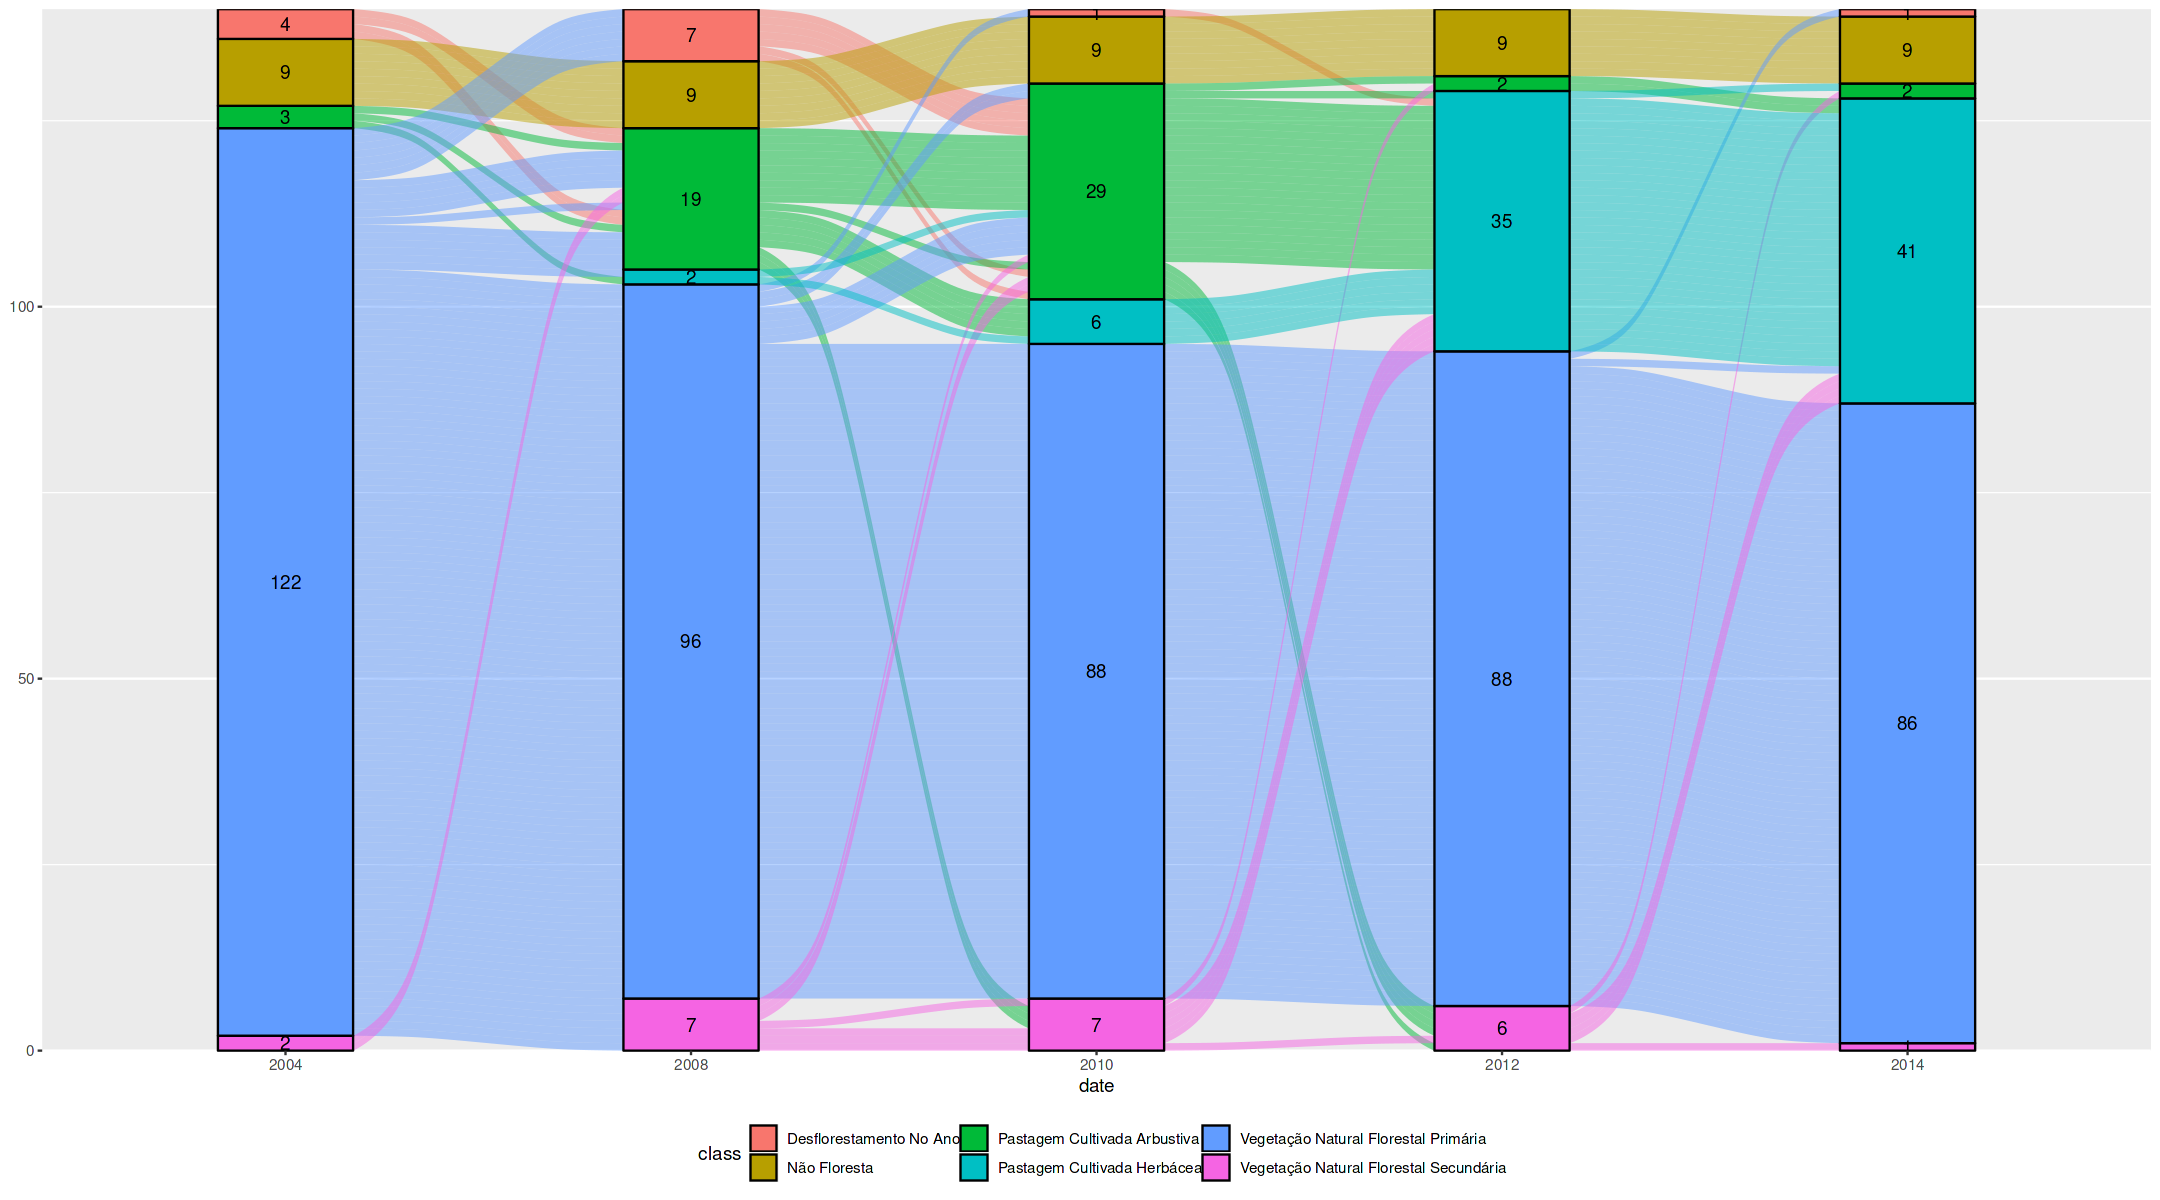

In [29]:
options(repr.plot.width=18, repr.plot.height=10)
plot(samples_trj,show_count = TRUE)

The generated plot can be customized using the functions in the `ggplot2` package, as shown below:

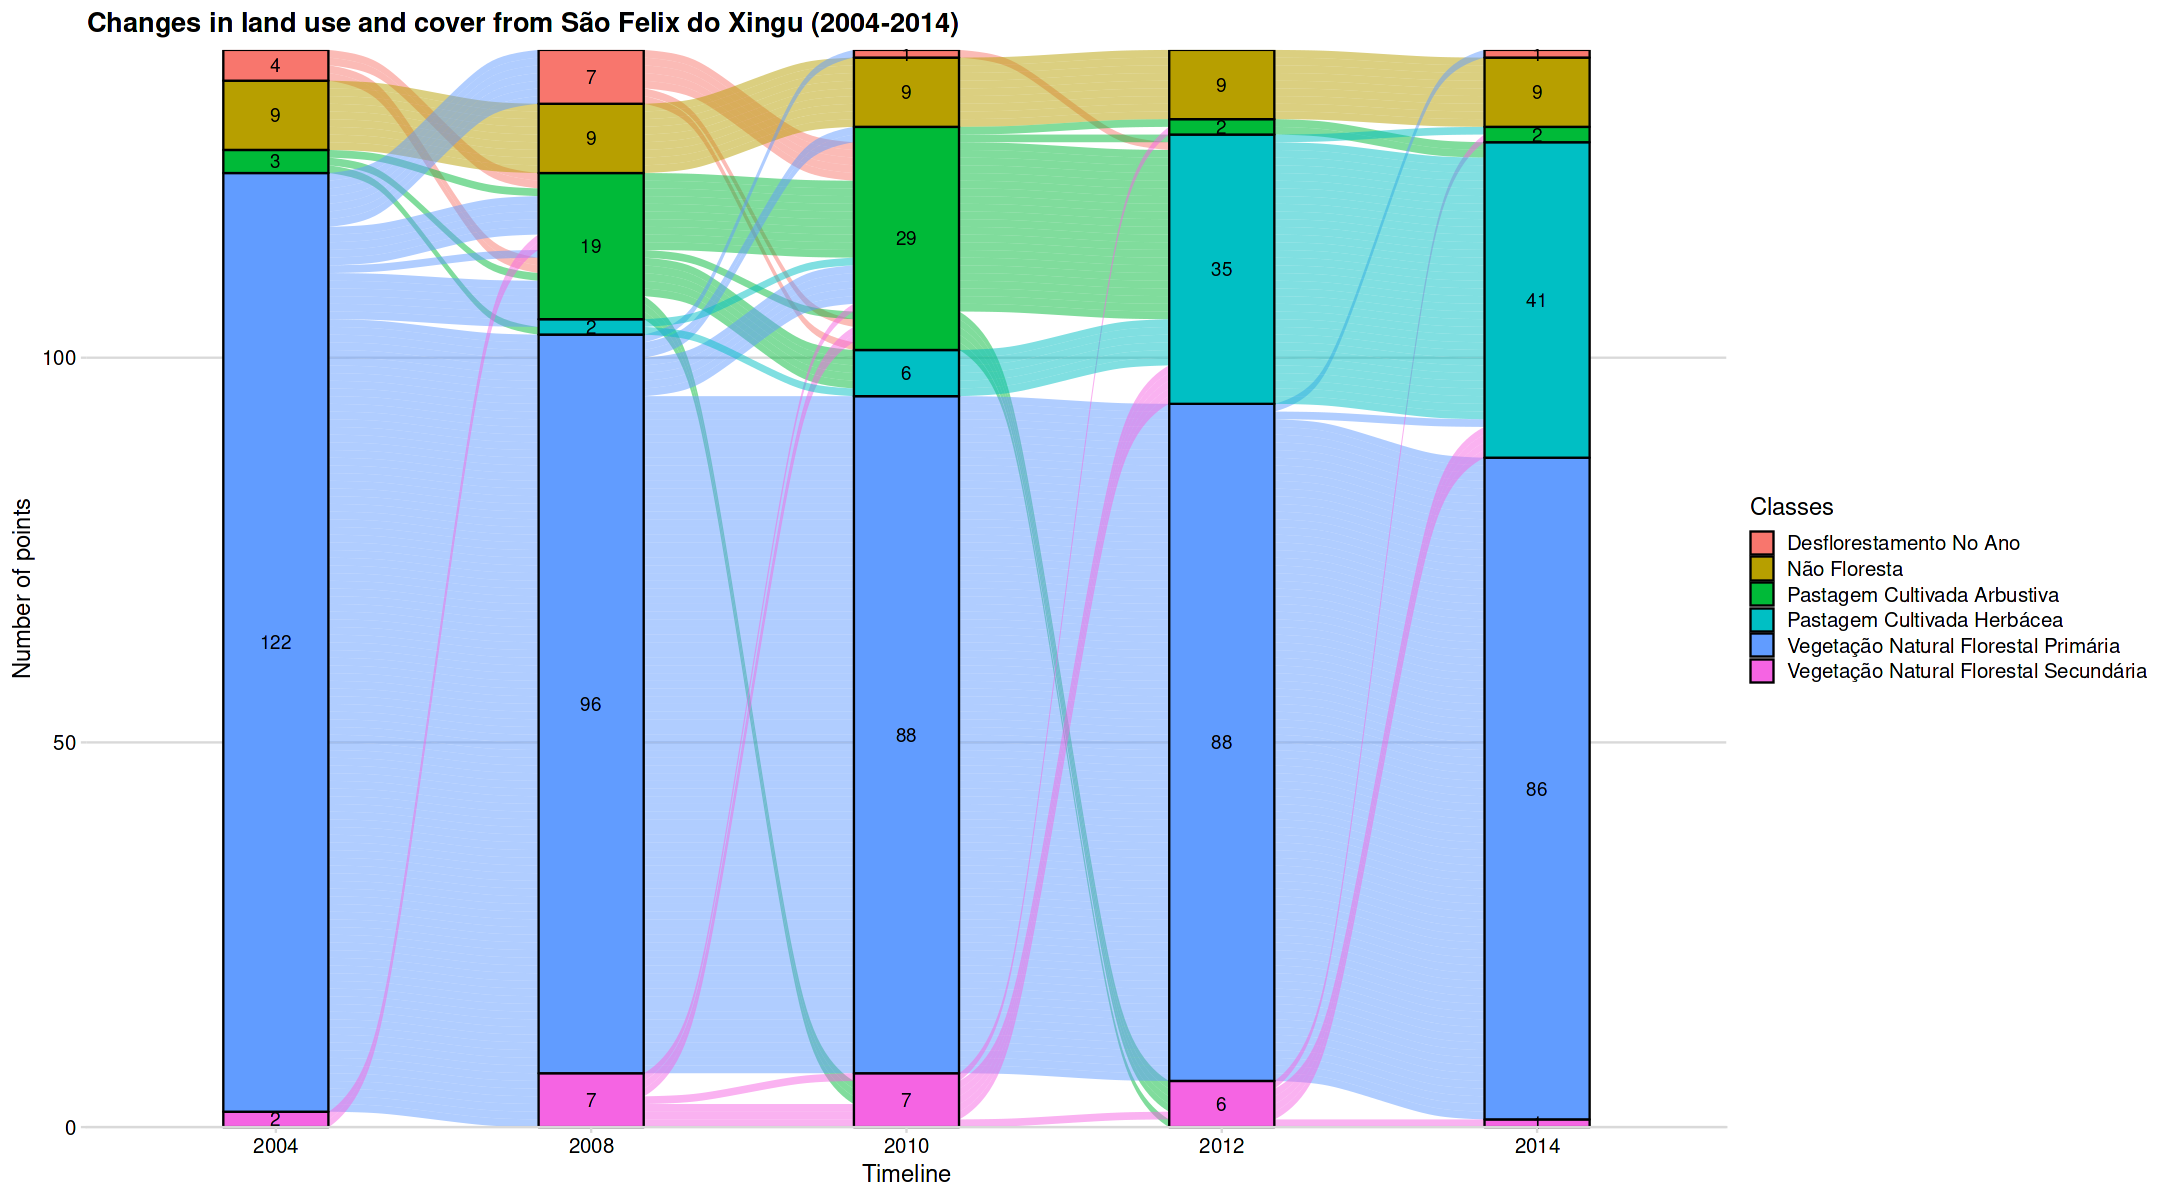

In [30]:
plot(samples_trj, show_count = TRUE) + 
    cowplot::theme_minimal_hgrid() + 
    labs(title = "Changes in land use and cover from São Felix do Xingu (2004-2014)",
         x = "Timeline",
         y = "Number of points",
         fill = "Classes")

In addition, we can add colors to our labels:

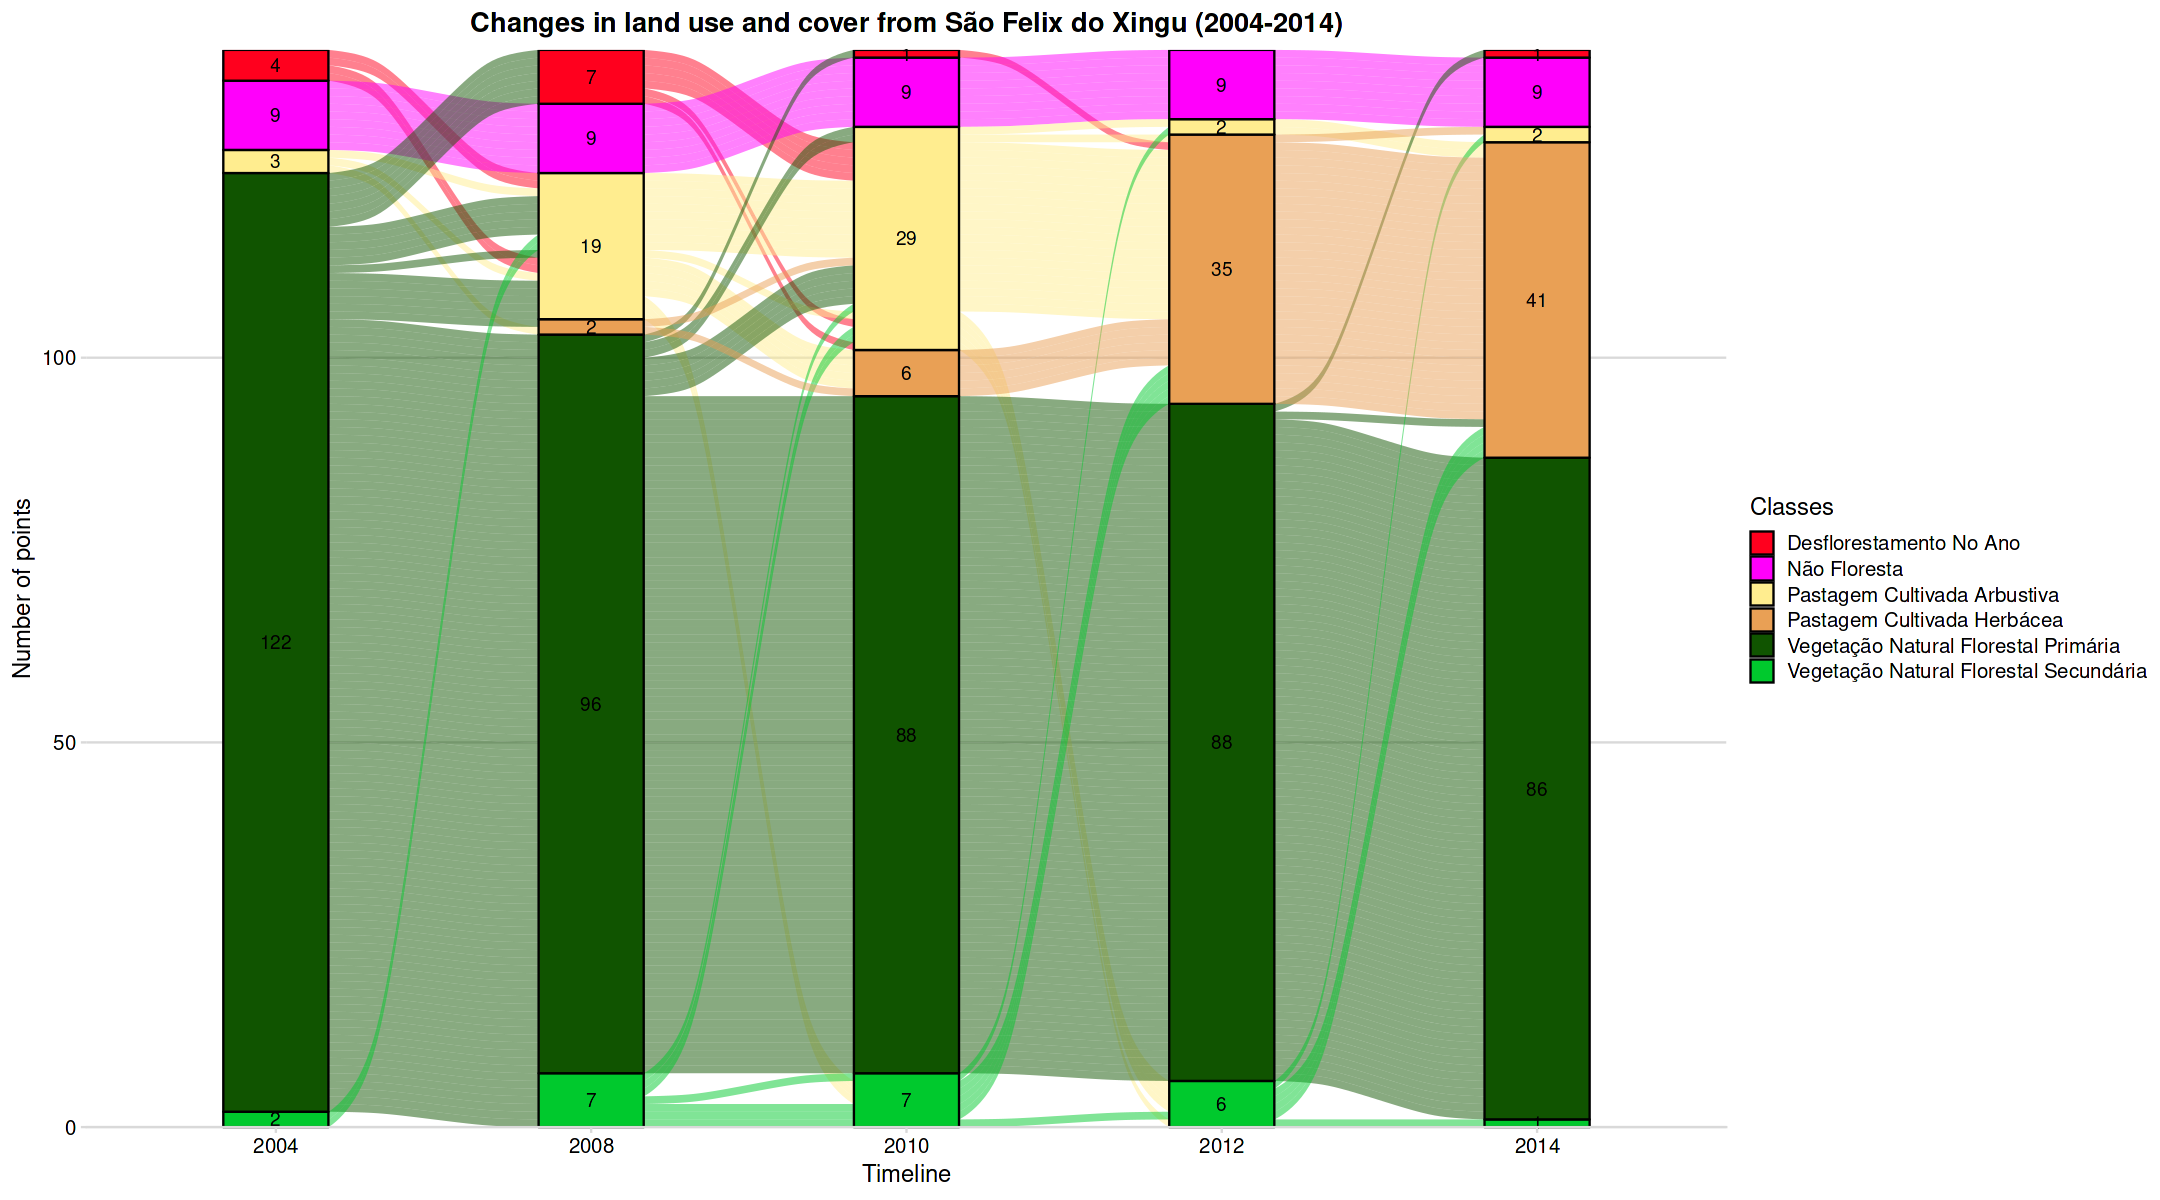

In [31]:
plot(samples_trj, show_count = TRUE) + 
    cowplot::theme_minimal_hgrid() + 
    labs(title = "Changes in land use and cover from São Felix do Xingu (2004-2014)",
         x = "Timeline",
         y = "Number of points",
         fill = "Classes") + 
    theme(plot.title = element_text(hjust = 0.5)) + 
    scale_fill_manual(values = c("#ff001e",
                                 "#ff00fb",
                                 "#ffed8f",
                                 "#e9a055",
                                 "#105400",
                                 "#00c92d"),
                      labels = c("Desflorestamento No Ano",
                                 "Não Floresta",
                                 "Pastagem Cultivada Arbustiva",
                                 "Pastagem Cultivada Herbácea",
                                 "Vegetação Natural Florestal Primária",
                                 "Vegetação Natural Florestal Secundária"))

# References
<hr style="border:1px solid #0077b9;">

- [Cliente em R para o Web Land Trajectory Service - Repositório GitHub](https://github.com/brazil-data-cube/rwlts)

- [Cliente em Python para o Web Land Trajectory Service - Repositório GitHub](https://github.com/brazil-data-cube/wlts.py)

- [WLTS OpenAPI 3 Especificação](https://github.com/brazil-data-cube/wlts-spec)

- [WLTS](https://github.com/brazil-data-cube/wlts)